# Number Theory I
______

**References:**
* [[GCAC](https://toc.cryptobook.us/)] A Graduate Course in Applied Cryptography, Dan Boneh and Victor Shoup
* [[CINTA](https://shoup.net/ntb/)] A Computational Introduction to Number Theory and Algebra, Victor Shoup
* [[HAC](https://cacr.uwaterloo.ca/hac/)] Handbook of Applied Cryptography, Alfred J. Menezes, Paul C. van Oorschot and Scott A. Vanstone
* [[ITMC](https://www.cs.umd.edu/~jkatz/imc.html)] Introduction to Modern Cryptography, Jonathan Katz and Yehuda Lindell (3rd Edition)
* [Elementary number theory in sage](http://doc.sagemath.org/html/en/constructions/number_theory.html)

**Dependencies:**

This notebook uses [sage math](https://www.sagemath.org/) as kernel

In [1]:
import sage.misc.banner # sage math version info 
rchars = "┘─│┐┌└"
smallbanner = sage.misc.banner.banner_text(full=True)
for c in rchars:
    smallbanner = smallbanner.replace(c,"") # remove ascii art box
print(smallbanner)
#banner() # full banner with box


 SageMath version 9.5, Release Date: 2022-01-30                     
 Using Python 3.10.12. Type "help()" for help.                      



## Number systems
Natural Numbers < Integers < Rational numbers < Real nunmbers 
<p style="text-align:center">
<img src="./figures/Number-systems.svg" alt="number systems" width="256">
</p>
<p style="text-align:center;font-size:10px">
<a href="https://upload.wikimedia.org/wikipedia/commons/1/17/Number-systems.svg">(image source)</a>
</p>

For cryptographic applications only (subsets of) the integers are important

## Integers
Possible notations:
* integers: $$
\mathbb{Z} = \{ \dots, -2, -1, 0, 1, 2, \dots \}
$$ 
* non-zero integers: $$ \mathbb{Z}^{\neq} = \mathbb{Z}^{*} = \{ \dots, -2, -1, 1, 2, \dots \} $$
* positive integers: $$ \mathbb{Z}^+ = \mathbb{Z}_+ = \mathbb{Z}^> = \{ 1, 2, \dots \} $$
* non-negative integers: $$ \mathbb{Z}^{0+} = \mathbb{Z}^\geq = \{ 0,1, 2, \dots \} $$

> The set of integers consists of zero (0), the positive natural numbers (1, 2, 3, ...), also called whole numbers or counting numbers, and their additive inverses (the negative integers, i.e., −1, −2, −3, ...).

<p style="text-align:right;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Integer">(source)</a>
</p>


### Integers in sage

In [2]:
Z = Integers(); Z # explicitly defined integers in sage

Integer Ring

In [3]:
-1 in Z and 0 in Z

True

In [4]:
ZZ # predefined set of integers in sage

Integer Ring

In [5]:
type(Z(2))

<class 'sage.rings.integer.Integer'>

In [6]:
type(2) # default data type in sage for whole numbers numbers 

<class 'sage.rings.integer.Integer'>

## Natural Numbers 

Also referred to as *non-negative integers* or *positive integers* if without $ 0 $. Possible notations:

* non-negative integers including zero: $$ \mathbb{N} = \mathbb{N}_0 = \{0,1,2,3,\dots\} $$
* **positive integers**: $$ \mathbb{N} = \mathbb{N}_1 = \mathbb{N}^* = \{1,2,3,\dots\} $$

Every *positive integer* is either **composite**, **prime**, or the **unit** $ 1 $

### Natural Numbers in sage

In [7]:
N = NonNegativeIntegers(); N  # Includes 0

Non negative integers

In [8]:
-1 not in N and 0 in N

True

In [9]:
N_1 = PositiveIntegers(); N_1  # Excludes 0

Positive integers

In [10]:
-1 not in N_1 and 0 not in N_1

True

### Divisability I
Terminology:
$$
\begin{align*}
\frac{divident}{divisor} &= quotient \\
\; \\
divident &= quotient \cdot divisor + remainder
\end{align*}
$$

### Divisability II
* $ a,b \in \mathbb{Z}$
  + If $ a $ *divides* $ b $ (without remainder), this is denoted by $ a | b $
  + If $ a $ does *not divide* $ b $, this is denoted by $ a  \nmid b $
* If $ a | b $ and $ a $ is positive, $ a $ is called a $ divisor $ of $ b $
  + If $ a \notin \{ 1, b \} $ then it is a *nontrivial divisor* or *factor* of $ b $
  + A positive integer $ p > 1 $ is **prime** if it has no factors (nontrivial divisors), so that his only divisors are $ 1 $ and itself
  + A positive integer that is not prime is called **composite**
  + Per convention $ 1 $ is neither prime nor composite but called **unit**

### Divisability III
* If $ a, b \in \mathbb{Z}$ and $ a | b $ then there exists some $ n \in \mathbb{Z} $ such that $ a \cdot n = b $
  + If $ a | b $ then $ a | (n \cdot b)$ for any $ n \in \mathbb{Z} $ 
  + If $ a | b $ and $ a | c $ then $ a | (b + c) $
* If $ a | b $ and $ a | c $, then $ a | (Xb + Yc)$ for any $ X,Y \in \mathbb{Z}$


### Divisability in sage

In [1]:
a = 3; b = 12
a.divides(b) # in sage

True

In [7]:
b % a == 0 # in python

True

In [3]:
a = 5; b = 12
a.divides(b)

False

In [4]:
b % a == 0

False

## Prime numbers

A **prime** is a natural number greater than $ 1 $ that is only divisible by $ 1 $ and itself. 
A natural number greater than $ 1 $ that is not prime is called **composite number**.
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f0/Primes-vs-composites.svg" alt="primes and composites" width="256">
</center>
<p style="text-align:center;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Prime_number#/media/File:Primes-vs-composites.svg">(image source)</a>
</p>

$ \mathbb{P} =\{2,3,5,7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43,... \}$


### Open questions

Several historical questions regarding prime numbers are still unsolved. 

These include <a href="https://en.wikipedia.org/wiki/Goldbach%27s_conjecture">Goldbach's conjecture</a>, that every even integer greater than 2 can be expressed as the sum of two primes, and the <a href="https://en.wikipedia.org/wiki/Twin_prime">twin prime conjecture</a>, that there are infinitely many pairs of primes having just one even number between them.
<p style="text-align:right;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Prime_number">(source)</a>
</p>


### Primes in sage
See also [sage documentation on primes](http://doc.sagemath.org/html/en/reference/sets/sage/sets/primes.html)

In [64]:
P = Primes(); P # define set of all primes in sage

Set of all prime numbers: 2, 3, 5, 7, ...

In [16]:
P.cardinality()

+Infinity

In [17]:
primes_first_n(14)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43]

In [18]:
P.first()

2

In [19]:
P.next(10) # get the next prime after the given number

11

In [20]:
# get a random 32 bit prime specified as beeing between lbound and n
random_prime(n=2**32-1,proof=True,lbound=2**31)  

3031999013

In [21]:
print(f"{bin(2**32-1)}\n{bin(2**31)}\n{len(bin(2**31)[2:])} bits each")

0b11111111111111111111111111111111
0b10000000000000000000000000000000
32 bits each


_____

In [22]:
random_prime?

Signature:      random_prime(n, proof=None, lbound=2)
Docstring:     
   Return a random prime p between "lbound" and n.

   The returned prime p satisfies "lbound" <= p <= n.

   The returned prime p is chosen uniformly at random from the set of
   prime numbers less than or equal to n.

   INPUT:

   * "n" - an integer >= 2.

   * "proof" - bool or None (default: None) If False, the function
     uses a pseudo-primality test, which is much faster for really big
     numbers but does not provide a proof of primality. If None, uses
     the global default (see "sage.structure.proof.proof")

   * "lbound" - an integer >= 2, lower bound for the chosen primes

   EXAMPLES:

      sage: p = random_prime(100000)
      sage: p.is_prime()
      True
      sage: p <= 100000
      True
      sage: random_prime(2)
      2

   Here we generate a random prime between 100 and 200:

      sage: p = random_prime(200, lbound=100)
      sage: p.is_prime()
      True
      sage: 100 <= p <= 200
      Tr

### Primality test
The test if a given number is prime is called *primality test*.

A simple inefficient primality test (and factorization algorithm) is *trial division*: Given an input number $ a $, check whether it is divisible by $ 2 $ or any odd number between $ 2 $ and $\sqrt {a}$. If so, it is not prime and this number is one of its factors. 

If we are only interested in the question if the number is prime or not, there are **deterministic tests** which run in polynomial time (e.g., [AKS primality test](https://en.wikipedia.org/wiki/AKS_primality_test)).

There are also **probabilistic tests** which are even faster but have small (configurable) error probability. 
Usually they never report a prime as a composite number, but it is possible that certain composite numbers are reported as prime. 

In [23]:
11 in P # check if number is prime in sage

True

10 in P 

____

#### Time complexity 
The running time of an algorithm taking as input an integer $ a $ is measured in terms of length of the binary representation of $ a $ denoted by $ \|a\| = n = \lfloor \log_2 a \rfloor + 1 $, where the leading (most significant) bit is $ 1 $. 

In [24]:
a = 100
n = math.floor(math.log2(a))+1; n

7

In [25]:
print(bin(a)[2:])
len(bin(a)[2:]) == n

1100100


True

#### Time complexity of Trial Division
Trial division has *exponential* runtime $ \approx \mathcal{O}(2^{n/2}) $ if every integer up to $\sqrt{a}$ is tested, as $\frac{\lfloor \log_2 a \rfloor}{2} \approx \sqrt{a}$. (As another optimization, only *prime numbers* between $ 2 $ and $\sqrt{a}$ can be checked if available.) 

In general, we only have to check the numbers up to $\sqrt{a}$ because for any prime factor $p > \sqrt{a}$ there must be another divisor $a/p \leq \sqrt{a}$ as well as a prime divisior $ q $ of $ a/p$. 

For example, consider the number 100:

In [26]:
big_O = math.floor(2**(n/2)); big_O

11

In [27]:
math.sqrt(a)

10.0

In [28]:
divisors(100)

[1, 2, 4, 5, 10, 20, 25, 50, 100]

If all numbers up to $ 100 $ are tested some divisors are discovered twice:

In [29]:
for i in range(1,a+1):
    if a % i == 0:
        print(f"{i}*{a // i}",end=",")

1*100,2*50,4*25,5*20,10*10,20*5,25*4,50*2,100*1,

In [30]:
for i in range(1,math.ceil(math.sqrt(a))):
    if a % i == 0:
        print(f"{i}*{a // i}",end=",")

1*100,2*50,4*25,5*20,

____

### Primality testing

In [6]:
def isPrime_trial_division(n: int) -> tuple[bool,list[int]]:
    """Return a list of the prime factors for a natural number."""
    a = []               # Prepare an empty list.
    f = 2                # The first possible factor.    
    while n > 1:         # While n still has remaining factors...
        if n % f == 0:   # The remainder of n divided by f might be zero.        
            a.append(f)  # If so, it divides n. Add f to the list.
            n //= f      # Divide that factor out of n.
        else:            # But if f is not a factor of n,
            f += 1       # Add one to f and try again.
    if len(a) > 0: 
        return (False, a)  # Prime factors may be repeated: 12 factors to 2,2,3.
    else:
        return (True, a)

In [22]:
def isPrime_trial_division_with_list_of_primes(n: int) -> bool:
    """ inefficient primality test using trial division with a list of primes """
    sqr_n = math.ceil(math.sqrt(n))
    primes_to_check = primes_first_n(sqr_n)
    for p in primes_to_check:
        if n % p == 0 and n != p:
            return False
    return True

In [15]:
def isPrime_sage(n) -> bool:
    """ wrapper function for primality tests in sage """
    return n in Primes(True)

In [16]:
def isPrime_sage_probabilistic(n) -> bool:
    """ wrapper function for probabilistic primality tests in sage """
    return n in Primes(False)

In [17]:
def isPrime_sage_BailiePSW(n) -> bool:
    """ wrapper function for that uses PARI's Baillie-PSW probabilistic primality test """
    return Integer(n).is_pseudoprime()

In [18]:
import gmpy2
def isPrime_python_gmpy2(n) -> bool:
    """ primality test in python using gmpy2 uses Miller-Rabin test
    https://gmpy2.readthedocs.io/en/latest/mpz.html#gmpy2.is_prime
    """
    return gmpy2.is_prime(int(n)) # has to be python int()

____

### Primality testing

In [12]:
import random
random_number = random.getrandbits(32) # get n bits random number
random_number

2147517165

In [13]:
%time isPrime_trial_division(random_number) # 32 bit random_number  

CPU times: user 846 ms, sys: 0 ns, total: 846 ms
Wall time: 844 ms


(False, [3, 5, 67, 2136833])

In [23]:
%time isPrime_trial_division_with_list_of_primes(random_number)

CPU times: user 15.5 ms, sys: 6.99 ms, total: 22.5 ms
Wall time: 31 ms


False

In [24]:
%time isPrime_sage(random_number)

CPU times: user 53 µs, sys: 12 µs, total: 65 µs
Wall time: 74.9 µs


False

In [25]:
%time isPrime_sage_probabilistic(random_number)

CPU times: user 43 µs, sys: 10 µs, total: 53 µs
Wall time: 58.9 µs


False

In [26]:
%time isPrime_sage_BailiePSW(random_number)

CPU times: user 366 µs, sys: 84 µs, total: 450 µs
Wall time: 7.52 ms


False

In [27]:
%time isPrime_python_gmpy2(random_number)

CPU times: user 0 ns, sys: 461 µs, total: 461 µs
Wall time: 7.18 ms


False

Note that, testing if a given positive integer is prime is resonably fast

### Factorization 

Factorization is thought to be a *computationally difficult* problem (i.e., **no** *polynomial-time* algorithm for factoring has been demonstrated).
Primality testing is comparatively easy.

* **Fundamental theorem of arithmetic:** every natural number greater than $ 1 $ is either a *prime* itself or can be *factorized* as a product of primes that is unique up to their order (ie., the order is not relevant)

In [44]:
factor(12) # prime factors of a composite number

2^2 * 3

In [45]:
factor(5) # prime factor of a prime

5

In sage [quadratic sieve](https://en.wikipedia.org/wiki/Quadratic_sieve) (`qsieve`) is a more [efficient factorization algorithm](https://doc.sagemath.org/html/en/thematic_tutorials/explicit_methods_in_number_theory/integer_factorization.html). It is the second-fastest known method after the [general number field sieve](https://en.wikipedia.org/wiki/General_number_field_sieve) (i.e., the time complexity is sub-exponential but still not polynomial). 

In [62]:
print(next_prime(2^80),next_prime(2^81)) # take two \approx 80 bit primes

1208925819614629174706189 2417851639229258349412369


In [47]:
%time qsieve(next_prime(2^80) * next_prime(2^81)) # factor the product

CPU times: user 6.59 ms, sys: 237 µs, total: 6.83 ms
Wall time: 703 ms


([1208925819614629174706189, 2417851639229258349412369], '')

______

## Modulo arithmetic
The notation $ a \mod N $ denotes the remainder of $ a $ upon division by $ N $. 

In [48]:
6*3 % 15 # modulo operation in python

3

In [49]:
mod(6*3,15) # modulo function in sage

3

Exponentiation (power of) some value modulo $ n $ e.g., $ 2^4 \mod 15 $

In [50]:
2**4

16

In [51]:
# python build in
pow(2,4,15)

1

In [52]:
# sage 
power_mod(2,4,15) # 2.powermod(4,15) # alternative notation

1

Exponentiation of some positive integer value $ x $ by $ p \in Primes $ minus 1, modulo this prime $ p $ equals 1 
$$
x^{(p - 1)} \mod p = 1
$$ 

In [53]:
somevalue = 5
modn = 23
somevalue**(modn-1) % modn

1

_____

### Integers modulo $n$
<a id='mod'></a>

* set of integers modulo $n$: $$ \mathbb{Z}_n=\{0,1,2,...,n-1\} $$
* sometimes also denoted as $ \mathbb{Z}/n\mathbb{Z} $, which stands for $ \mathbb{Z} $ without all multiples of $ n $

**Example:**
If $n=15$ then
$ \mathbb{Z}_n=\{0,1,2,4,5,6,7,8,9,10,11,12,13,14\} $

In [45]:
Zn = IntegerModRing(15); Zn

Ring of integers modulo 15

In [46]:
Zn.list() # list all elements

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [47]:
Zn.order() # number of elements 

15

### Integers modulo $n$

In [57]:
Zn.list() # list all elements where n=15

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [58]:
6*3 # result in the set of integers

18

In [59]:
Zn(6*3) # result in the set of integers mod n

3

In [60]:
Zn.random_element()

9

___

### Integers modulo $ n $ examples in sage

In [61]:
Z = Integers(); Z 

Integer Ring

In [62]:
Zn = Integers(15); Zn 

Ring of integers modulo 15

In [63]:
Zn = Zmod(15); Zn

Ring of integers modulo 15

In [64]:
Zn = IntegerModRing(15); Zn 

Ring of integers modulo 15

In [65]:
6*3 == Z(6*3) == ZZ(6*3) # same result in the set of integers

True

In [66]:
# Note that sage comparison recognizes this as equal,
# which is somehow counter intuitive! 
Z(6*3) == Zn(6*3)

True

___

## Greatest common divisor (GCD)
The **greatest common divisor** (gcd) of two or more integers, which are not all zero, is the largest positive integer that divides each of the integers (without remainder). 
* Commutaive: $$ gcd(a,b) =  gcd(b,a) $$
* Associative: $$ gcd(a,b,c) = gcd(gcd(a,b),c) =  gcd(a,gcd(b,c)) $$ 


### GCD examples

In [67]:
def div(dividend,divisor):
    """ simple division function that returns quotient and remainder """
    quotient = dividend // divisor
    if quotient == 0:
        remainder = divisor
    else:
        remainder = dividend % divisor
    return (quotient,remainder)

In [68]:
div(12,9)

(1, 3)

In [69]:
number_of_divisors(12) # the number of divisors of a number

6

In [70]:
divisors(12) # list of divisors of a number

[1, 2, 3, 4, 6, 12]

In [71]:
divisors(9) 

[1, 3, 9]

In [72]:
gcd(12,9) # sage gcd

3

In [42]:
gcd(9,gcd(12,42)) # of three numbers

3

In [8]:
import math 
math.gcd(2,15) # python3 gcd

1

In [74]:
# python2 gcd
#from fractions import gcd as pygcd
#pygcd(12,9)

___

## Leat common multiple (LCM)
The **least common multiple** (lcm) of two or more non-zero integers, is the smallest positive integer that is divisible by each of the integers. 
* Commutative: $$ lcm(a,b) = lcm(b,a) $$
* Associative: $$ lcm(a,b,c) = lcm(lcm(a,b),c) = lcm(a,lcm(b,c)) $$ 

In [29]:
lcm(4,6)

12

## LCM and GCD
* $ lcm(a,b) = \frac{|a\cdot b|}{gcd(a,b)} $
* $ gcd(a,b) = \frac{|a\cdot b|}{lcm(a,b)} $
* $ gcd(a,b) \cdot lcm(a,b) = |a\cdot b| $

___

### Euclidean algorithm 

The Euclidean algorithm is an efficient method for computing the *greatest common divisor* (GCD) of two numbers.

The basic principle is that replacing the larger of the two numbers by its difference with the smaller number does not change the greatest common divisor. This process is reapeated until the remainder is $ 0 $. The last non-zero difference is the gcd. 

The following is a visual example of computing the gcd of $ 49 $ (black) and $ 21 $ (red), which is $ 7 $. 
<p style="text-align:center">
<img src="./figures/euclid.png" alt="Euclidean algorithm" width="150">
</p>
<p style="text-align:center;font-size:10px">
<a href="https://upload.wikimedia.org/wikipedia/commons/3/37/Euclid%27s_algorithm_Book_VII_Proposition_2_3.png">(image source)</a>
</p>


### Euclidean algorithm animation
Animation of computing the Euclidean algorihm for $gcd(62,36) = 2$:
<p style="text-align:center;font-size:10px">
<video width="480" controls src="https://upload.wikimedia.org/wikipedia/commons/transcoded/5/5f/The_Great_Common_Divisor_of_62_and_36_is_2.ogv/The_Great_Common_Divisor_of_62_and_36_is_2.ogv.720p.vp9.webm"></video>
</p>
<p style="text-align:center;font-size:10px">
<a href="https://en.wikipedia.org/wiki/File:The_Great_Common_Divisor_of_62_and_36_is_2.ogv">(video source)</a>
</p>

____

### Euclidean algorithm example

In [75]:
def euclide(a, b,verbose=False):
    """ euclidean algorithm as a recursive function """
    assert a >= b,"a must be larger than b"
    if verbose: print(f"a = {a:3}  b = {b:3}")
    if b == 0:
        return a
    else:
        return euclide(b, a % b,verbose)

In [76]:
euclide(12,9,True)

a =  12  b =   9
a =   9  b =   3
a =   3  b =   0


3

In [77]:
euclide(62,36,True)

a =  62  b =  36
a =  36  b =  26
a =  26  b =  10
a =  10  b =   6
a =   6  b =   4
a =   4  b =   2
a =   2  b =   0


2

In [78]:
def euclide_while(a,b,verbose=False):
    """ euclidean algorithm with while loop """
    assert a >= b,"a must be larger than b"
    b_new = None
    while b != 0:
        b_new = a - a // b * b # equivalent to a mod b 
        a = b
        b = b_new
        if verbose: print(f"a = {a} b = {b}")
    return a

In [79]:
euclide_while(62,36,True)

a = 36 b = 26
a = 26 b = 10
a = 10 b = 6
a = 6 b = 4
a = 4 b = 2
a = 2 b = 0


2

In [80]:
euclide_while(12,9,True)

a = 9 b = 3
a = 3 b = 0


3

## Relatively prime (coprime)

If $gcd(a,b)=1$ then $a$ and $b$ are called **relatively prime** or **coprime**.

Neither $ a $ or $ b $ has to be prime in order for them to be *relatively prime* to each other. 
One example would be $ 8 $ and $ 9 $. 

In [81]:
gcd(8,9) 

1

In [82]:
8 not in P and 9 not in P

True

### Relatively prime (coprime)

If either $ a $ or $ b $ is prime, then they might, or might not be *relatively prime* to each other:
* All integers from $ 1 $ to $ p \in \textrm{Primes}$ have to be relatively prime to $ p $
* There might be an integer $ z > p $ of which $ p $ is a prime factor. In this case $ z $ and $ p $ are not *relatively prime*
  
For example, $ 4 $ and $ 5 $ are coprime, whereas $ 10 $ and $ 5 $ are not coprime. 

In [83]:
gcd(4,5)

1

In [84]:
gcd(10,5)

5

In [85]:
5 in P and 10 not in P

True

**Question:** If both numbers $a$,$b$ are prime, are they relatively prime to each other?

The answers is of course yes, since per definition of a prime they cannot have a common divisor, i.e., $\gcd(a,b) = 1 $ 

In [86]:
# example 5 and 3 
assert 5 in P and 3 in P
gcd(5,3)

1

____

### Some important properties of coprime numbers 
If $\gcd(a,b) = 1 $ then:
* No prime number divides both $ a $ and $ b $
* There exist integers $ x,y $ such that $ ax + by = \gcd(a,b) = 1 $ (*Bézout's identity* representing the gcd is one in this case)
    + The integer $ a $ has a *multiplicative inverse* ($x$) modulo $ b $
    + The integer $ b $ has a *multiplicative inverse* ($y$) modulo $ a $

____

#### Fermat primality test 

The Fermat primality test is the simplest probabilistic primality test, which actually tests if the given number $ n $ is composite or *may be* prime. 

> Given an integer $ n $, choose some integer $ a $ coprime to $ n $ and calculate $ a^{n − 1} \pmod n$. If the result is different from $ 1 $, then $ n $ is composite. If it is $ 1 $, then $ n $ may be prime.
<p style="text-align:right;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Primality_test">(source)</a>
<a href="https://en.wikipedia.org/wiki/Fermat_primality_test">(more info)</a>
<a href="https://en.wikipedia.org/wiki/Pseudoprime">(more info)</a>
</p>

If $ a^{n − 1} \pmod n = 1$ but $ n $ is *not* prime, then $ n $ is called a **pseudoprime to base $ a $**. 
An example would be $ n = 341 $ and $ a=2 $. There are only $ 21853 $ pseudoprimes to base $ 2 $ which are smaller than $ 2.5 \cdot 10^{10} $. 


In [87]:
gcd(341,2)

1

In [88]:
2^(341-1) % 341

1

In [89]:
341 in P 

False

#### Fermat's little theorem

The *Fermat primality test* follows from *Fermt's little theorem* which states that:

i) if $ n $ is a prime number, then for any integer $ a $, the number $a^{n} − a$ is an integer multiple of $ n $: 

$a^n \equiv a \pmod n $.

For example, if $ a = 2 $ and $ n = 7 $, then $ 27 = 128$ , and $ 128 − 2 = 126 = 7 \cdot 18$  is an integer multiple of $ 7 $.

ii) If $ a $ is not divisible by $ n $, that is, if $ a $ is coprime to $ n $, then Fermat's little theorem is equivalent to the statement that $ a^{n − 1} − 1$ is an integer multiple of $ n $:

$ a^{n − 1} \equiv 1 \pmod n $

For example, if $ a = 2 $ and $ n = 7 $, then $ 26 = 64 $, and $ 64 − 1 = 63 = 7 \cdot 9 $ is a multiple of $ 7 $. 

<p style="text-align:right;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Fermat%27s_little_theorem">(more info)</a>
</p>

In [90]:
2**7 % 7 == 2 % 7

True

In [91]:
2**(7 - 1) % 7 == 1 % 7

True

#### Carmichael numbers

The composite numbers which have the property that $ a^{n-1} \pmod n $ for every $ a $ that is coprime to $ n $ are called Carmichael numbers. The smallest Carmichael number is $ n = 561 $. 
<p style="text-align:right;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Carmichael_number">(more info)</a>
</p>

______

## Modular multiplicative inverses
An element $ x \in \mathbb{Z}_n $ is invertible iff $ \gcd(x,n) = 1 $ i.e., there exists an element $ x^{-1} $ s.t., $ x \cdot x^{-1} = 1 \pmod{n} $. 

This value $x^{-1}$ is called the **modular multiplicative inverse** of $ x $.

**Examples:**
* In $ \mathbb{Q} $ the inverse of $ 3 $ would be $ 1/3 $ since $ 3 \cdot 1/3 = 1 $.
* In $ \mathbb{Z}_n $ the inverse of $ 2 $ would be $ \frac{n+1}{2} $ since $ 2 \cdot \frac{n+1}{2} = n + 1 = 1 \pmod{n} $

In [61]:
n=15; inv_of_two_in_Zn = (n+1)/2; print(f"Inverse of 2 in Z_{n} is {inv_of_two_in_Zn}")
assert (2 * inv_of_two_in_Zn % n) == 1 

Inverse of 2 in Z_15 is 8


### A set where very element has an inverse 
A subset of the set of integers modulo $n$, in which all elements are *coprime (relatively prime)* to $n$ is defined as:

$$
\mathbb{Z}^*_n = \{ x \in \mathbb{Z}_n : \gcd(x,n)=1 \}
$$

The set $ \mathbb{Z}_n^* $ forms a *group* under mutliplication, hence the $^*$ symbol (see [definition of a group](./Number_Theory_I.slides.html#group) for more details)

To construct this set  all elements in $ \mathbb{Z}_n $ that are not invertible have to be eliminated. This includes $ 0 $ as it does not have an inverse. 

**Example:**

If $n=15$ then $ \mathbb{Z}^*_n = \{ 1,2,4,7,8,11,13,14 \} $ and the order is $ | \mathbb{Z}^*_n | = 8 $

For small $n$, this set can be computed by iterating through the elements of $\mathbb{Z}_n$ and check if $\gcd(x,n) = 1 $. This is computationally inveasable for large $n$, but computing a multiplicative inverse of an element $ x \in \mathbb{Z}_n $, where $ \gcd(x,n) = 1 $ can be done in polynomial time, for example by using the extended Euclidean algorithm.  


In [92]:
n=15
invertable_elememnts_Zn = list()
for i in range(0,n):
    if 1 == gcd(i,n):
        invertable_elememnts_Zn.append(i)
print(f"{invertable_elememnts_Zn} len={len(invertable_elememnts_Zn)}")

[1, 2, 4, 7, 8, 11, 13, 14] len=8


______

#### The existence of multiplicate inverses

<div style="background:ghostwhite">
    
**LEMMA:** 
An element in $Z_b$: $a \in Z_b$ has an inverse iff $gcd(a,b)=1$. 

**PROOF:** 

$$
\begin{split}
gcd(a,b) &=1 \\
\exists x,y: a\cdot x + b\cdot y &= 1 \\
\exists x,y: a\cdot x + b\cdot y &= 1 \pmod b \implies\\
a\cdot x &= 1 \pmod b  \implies\\
x^{-1} &= a \pmod b 
\end{split}
$$

In other words: In $\pmod b$ the term $b\cdot y$ is always $0$ therefore $a=x^{-1}$ (or conversely $x=a^{-1}$)

It is also possibel to prove this by contradiction and show that there is no inverse if $gcd(a,b)>1$:
$$
\begin{split}
gcd(a,b) &> 1 \\
\forall x: gcd(a\cdot x,b) &> 1 \pmod b \implies \\
a\cdot x &\neq 1 \pmod N
\end{split}
$$
In other words: If $gcd(a,b)>1$ then since $b\cdot y$ cancelles out in $\pmod b$, then $a\cdot x$ also has to be greater then one. Therefore, there is no $a$ such that $a\cdot x \neq 1$ 
</div>

<div style="background:ghostwhite">

**LEMMA:** If $gcd(a,b)=2$, then $a$ is *not* invertable $\pmod b$

**PROOF:**

The result of $gcd(a,b)=2$  is even since $2$ has to devide $a$ and $b$, therefore
$\forall a: a\cdot x$ is even. This would imply that $b\cdot y$ is also even.
To have an inverse ($x^{-1}=a$), the following relation is required to be equal one: $a\cdot x=1$. Therefore, also the following equallity has to hold:
$$
a\cdot x = b\cdot y+1
$$
But since $a\cdot x$ has to be even as well as $b\cdot y$, then $b\cdot y+1$ has to be odd. Since even can not equal odd it is the case that:
$$
a\cdot x \neq b\cdot y+1
$$
</div>

For more information on multiplicative inverses see wikipedia [here](https://en.wikipedia.org/wiki/Multiplicative_inverse) and [here](https://en.wikipedia.org/wiki/Modular_multiplicative_inverse).

______

### Extended Euclidean algorithm

The extended Euclidean is an extension to the Euclidean algorithm which computes the gcd of $ a $ and $ b $, *as well as* the 
coefficients of *Bézout's identity*, which are the integers $ x $ and $ y $ such that:

$$ ax + by = \gcd(a,b) $$

If $ a $ and $ b $ are *coprime*, i.e., $\gcd(a,b)=1$, then $ x $ is the **modular multiplicative inverse** of $ a \mod b $ and 
$ y $ is the modular multiplicative inverse of $ b \mod a $.

In [93]:
# exteneded euclidean algorithm in sage
xgcd(2,15) # returns (gcd,x,y)

(1, -7, 1)

In [94]:
mod(-7,15) # compute x mod b to get the inverse of a mod b 

8

In [95]:
# compute the inverse of a mod b directly in sage
inverse_mod(2,15)

8

In [96]:
# compute the modular multiplicative inverse in python 3.8
pow(2,-1,15)

8

#### Extended Euclidean algorithm complexity
The extended euclidean algorithm can be used to compute the modular multiplicative inverse of $ a \mod b $ in polynomial time.
In big $\mathcal{O}$ notation this algorithm runs in time $\mathcal{O}(\log_2(b))$ (assuming $a$ < $b$).

#### Example implementation

In [97]:
# compute the modular multiplicative inverse python <= 3.7
def xgcd_python(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = xgcd_python(b % a, a)
        return (g, x - (b // a) * y, y)

def inverse_mod_python(a, m):
    g, x, y = xgcd_python(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

In [98]:
assert inverse_mod_python(2,15) == inverse_mod(2,15)

In [99]:
def ext_euclide(a,b,verbose=True): 
    """ verbose implementation of the extended Euclidean algorithm """
    # initialize values for computing gcd(a,b):
    r_last, r_now = a, b
    r_next = None
    # initialize values for computing coefficients 
    x_last, x_now = 1,0  
    y_last, y_now = 0,1  
    q, idx = None, 0
    if verbose: 
        print(f"{idx:3}:  r = {r_last:6}  q = {q or 'None':4}  x = {x_last:6}  y = {y_last:6} ")
    
    while r_next != 0:
        idx += 1     
        if r_next is not None:
            # omit in the first round 
            r_now, x_now, y_now = r_next, x_next, y_next
        assert r_now == x_now * a + y_now * b 
        
        q = r_last // r_now # quotient of this round
        if verbose: 
            print(f"{idx:3}:  r = {r_now:6}  q = {q or 'None':4}  x = {x_now:6}  y = {y_now:6} ")
        
        r_next = r_last - q * r_now   
        r_last = r_now
        
        x_next = x_last - q * x_now   
        x_last = x_now
        
        y_next = y_last - q * y_now   
        y_last = y_now  

    if verbose: 
        print(f"{idx+1:3}:  r = {r_next:6}  q = {q or 'None':4}  x = {x_next:6}  y = {y_next:6} ")
    return (r_now,x_now,y_now)

In [100]:
r = ext_euclide(240,46); assert r == xgcd(240,46); r

  0:  r =    240  q = None  x =      1  y =      0 
  1:  r =     46  q =    5  x =      0  y =      1 
  2:  r =     10  q =    4  x =      1  y =     -5 
  3:  r =      6  q =    1  x =     -4  y =     21 
  4:  r =      4  q =    1  x =      5  y =    -26 
  5:  r =      2  q =    2  x =     -9  y =     47 
  6:  r =      0  q =    2  x =     23  y =   -120 


(2, -9, 47)

In [101]:
def inverse_mod_ext_euclide(element,n):
    """ calculate modular multiplicative inverse using verbose impl. of ext_euclide """
    gcd,x,y = ext_euclide(element,n,verbose=False)
    assert gcd == 1,"given values are not coprime"
    return mod(x,n)

In [102]:
inverse_mod_ext_euclide(2,15)

8

## Euler's totient function $\varphi(n)$
<a id='phi_n'></a>
Eulers totient function, written as $\varphi(n)$ or $\phi(n)$, gives the count of integers that are relatively prime to $n$. This resembles the number of *invertable elements* in $ \mathbb{Z}_n $, i.e., elements that have an inverse in $\mathbb{Z}_n$.

To compute the function the *prime factors* of $n$ need to be known!

If there are $ r $ different prime factors $\{p_1,p_2,\dots,p_r\}$ of $ n $, the function $ \varphi(n) $ can be computed as follows:
$$
\varphi(n) = n \cdot \prod_{i=1}^{r} \left (1 - \frac{1}{p_i} \right ) 
$$

**Example:**
* $ \varphi(20)= \varphi(2^2 \cdot 5) = 20 \cdot (1-\frac{1}{2}) \cdot (1-\frac{1}{5}) = 20 \cdot \frac{1}{2} \cdot \frac{4}{5} = 8 $

In [103]:
euler_phi(20) # Eulers totient function in sage

8

#### Example implementation

In [104]:
def eulers_phi_function(n):
    """ verbose impl. of Euler's phi function """
    prime_factors = factor(n)
    for i in prime_factors:
        n *= (1 - 1/int(i[0]))
    return n

In [105]:
eulers_phi_function(20)

8

### Euler's totient function when $n \in \textrm{Primes}$
If $n=p \in \textrm{Primes}$ this implies that the group of elements in $\mathbb{Z}_p$ which have a multiplicative inverse modulo $ p $, i.e., the group $\mathbb{Z}^*_p$, has $p-1$ elements, i.e.,  $|\mathbb{Z}^*_p|=p-1$ since:
 + all integers from $1$ to $p$ have to be relatively prime to $p$, the only exeception is $0$, since $gcd(0,p)=0$. Therefore this element needs to be removed. 
 + for all other numbers in the set it holds that, per defintion of a prime number it is not devisable by any other number than 1. 
$$
\mathbb{Z}^*_p = \mathbb{Z}_p / \{0\} = \{1,2,...,p-1\} \qquad \textrm{if } n \in \textrm{Primes}
$$

In other words: Despite $0$ every other element in $\mathbb{Z}_p$ is invertable

**Example:** If $N=7$ then $ \mathbb{Z}^*_p = \{ 1,2,3,4,5,6,7 \} $

In [106]:
euler_phi(7)

6

#### Visualization of Euler's totient function when $n \in \textrm{Primes}$

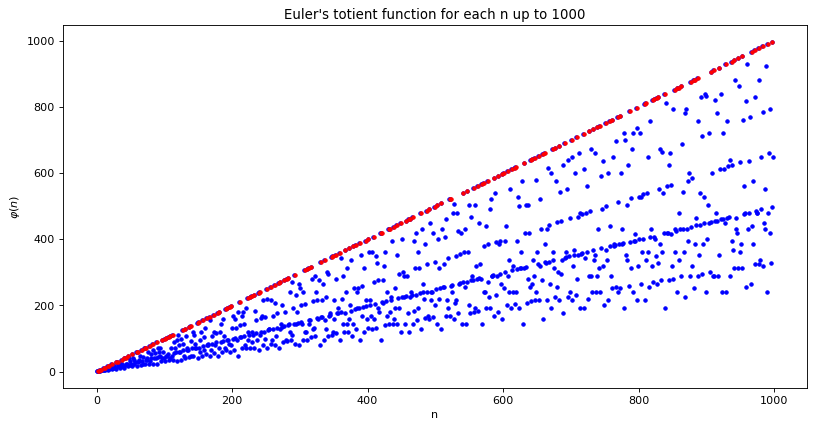

In [107]:
import matplotlib.pyplot as plt
n=1000
primes_up_to_n = list()
euler_phi_result_for_prime = list()
for i in range(1,n+1):
    if euler_phi(i) == i-1:
        primes_up_to_n.append(i)
        euler_phi_result_for_prime.append(euler_phi(i))
plt.figure(figsize=(12, 6), dpi=80)
plt.title(f"Euler's totient function for each n up to {n}")
plt.xlabel('n')
plt.ylabel('$\\varphi(n)$')
plt.plot([int(euler_phi(i)) for i in range(1,n)], 'b.')
plt.plot(primes_up_to_n,euler_phi_result_for_prime, 'r.')
plt.savefig("./figures/phi_n.png")
#plt.show()

<p style="text-align:center">
<img src="./figures/phi_n.png" alt="phi of n when n prime" width="800">
</p>
<p style="text-align:center;font-size:10px">
Phi of n, when n is prime the dot is colored red
</p>

### Euler's totient function when $n=pq$ and $p,q \in \textrm{Primes}$
If $n$ is a product of two *distinct primes* $p$ and $q$, then the number of elements in $\mathbb{Z}_n^*$, denoted by $|\mathbb{Z}^*_n|$, is given by: 
$$
\begin{align*}
\varphi(n)&=(p-1)(q-1) \\
\end{align*}
$$
* In this case $p$ and $q$ are approx. the size of $\sqrt{n}$, i.e., $p,q \approx \sqrt{n}$
* In this case also $\varphi(n)$ is close to the size of $n$ since $n=pq$ and
$$
\begin{align*}
\varphi(n) &= (p-1)(q-1) \\
&= n - p - q + 1 \\
&\approx n - 2 \cdot \sqrt{n} \\
&\approx n 
\end{align*}
$$
* Therefore if you pick a random element in in $\mathbb{Z}_n$, where $n=pq$ and $p,q \in \textrm{Primes}$ it is very likely to be invertable. 

#### Euler's totient function when $n=pq$ and $p,q \in \textrm{Primes}$

**Examples:** 

If $p=3$ and $q=5$ then $n=15$ and $ \mathbb{Z}^*_n = \{ 1,2,4,7,8,11,13,14 \} $ and $|\mathbb{Z}^*_n| = 8 $

In [108]:
# other larger example:
p=1009; assert p in Primes(); 
q=1013; assert q in Primes(); 
n=p*q; print(f"n = {n}")

n = 1022117


In [109]:
n not in Primes()

True

In [110]:
assert euler_phi(n) == (p-1)*(q-1) # Number of invertable elements $\varphi(n)$
(p-1)*(q-1) # almost as large as n 

1020096

#### Visualization of Euler's totient function when $n = pq$ and $p,q \in \textrm{Primes}$

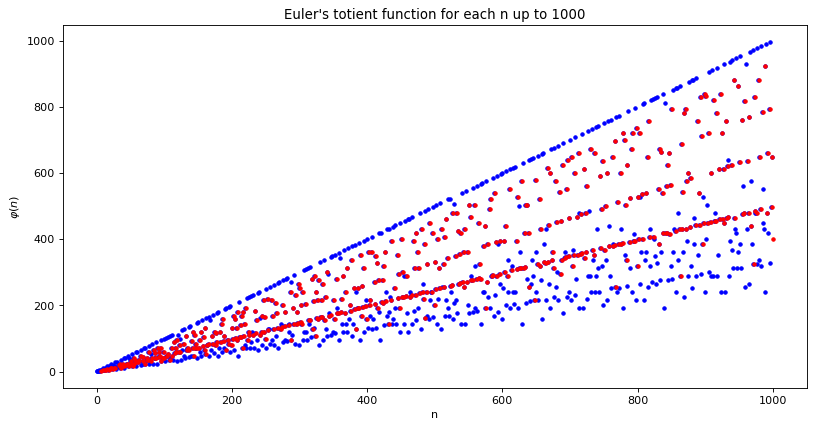

In [111]:
import matplotlib.pyplot as plt
n=1000
two_prime_factors = list()
euler_phi_result_for_two_factors = list()
for i in range(1,n+1):
    factors = factor(i)
    if len(factors) == 2:
        two_prime_factors.append(i)
        euler_phi_result_for_two_factors.append(euler_phi(i))
plt.figure(figsize=(12, 6), dpi=80)
plt.title(f"Euler's totient function for each n up to {n}")
plt.xlabel('n')
plt.ylabel('$\\varphi(n)$')
plt.plot([int(euler_phi(i)) for i in range(1,n)], 'b.')
plt.plot(two_prime_factors,euler_phi_result_for_two_factors, 'r.')
plt.savefig("./figures/phi_pq.png")
#plt.show()

<p style="text-align:center">
<img src="./figures/phi_pq.png" alt="phi of n when n prime" width="800">
</p>
<p style="text-align:center;font-size:10px">
Phi of n, when n is the product of two primes the dot is colored red
</p>

______

### Euler's theorem

As an alternative to the extended Euclidean algorithm, Euler's theorem may be used to compute modular multiplicative inverses [[cf.](https://en.wikipedia.org/wiki/Modular_multiplicative_inverse)]. 

Euler's theorem states that, if $x$ is *coprime* to $ n $, i.e., $\gcd(x,n)=1$ then:
$$
x^{\varphi(n)} \equiv 1 \pmod n 
$$
Here $\varphi(n)$ denotes the Euler's totient function. 

Therefore a *modular multicative inverse* can be found directly 
$$
x ^{\varphi(n)-1} \equiv x^{-1} \pmod n
$$
In the special case where $ n \in \textrm{Primes}$, $\varphi(n) = n-1 $ a modular multiplicative inverse is given by:
$$
x^{-1} \equiv x^{n-2} \pmod n
$$
The disadvantages of this method are:
* That the value $\varphi(n)$ must be known (which requires knowing the factors of $n$).
* The computational cost of exponentiation.
> One notable advantage of this technique is that there are no conditional branches which depend on the value of a, and thus the value of a, which may be an important secret in public-key cryptography, can be protected from side-channel attacks. For this reason, the standard implementation of Curve25519 uses this technique to compute an inverse.

<p style="text-align:right;font-size:10px">
<a href="https://en.wikipedia.org/wiki/Modular_multiplicative_inverse">(source)</a>
</p>


In [112]:
bits=32
p = random_prime(2**bits-1, proof=proof, lbound=2**(bits-1))
q = random_prime(2**bits-1, proof=proof, lbound=2**(bits-1))
n=p*q
phi_n=(p-1)*(q-1)

In [113]:
Zn = Integers(n)

In [114]:
x = Zn.random_element(); x

2902340178391946541

In [115]:
_x = Zn(x^(phi_n-1)); _x

4696244591587495893

In [116]:
_x = x**(phi_n-1) % n; _x # plain python

4696244591587495893

In [117]:
assert Zn(x * _x)  == 1

From Euler's theorem it also follows that, for all elements in a multiplicative group $\mathbb{Z}^*_n$, where all elements are coprime to $ n $ (and thus invertable), any elmented raised to $\varphi(n)$ will yield the multiplicative identity element, i.e., $1$
$$
\forall x \in \mathbb{Z}^*_n: x^{\varphi(n)} \equiv 1 \pmod{\mathbb{Z}_n}
$$

**Example:**
$$
4^{\varphi(15)} = 4^8 = 32 = 1 \pmod{ \mathbb{Z}_{15} }
$$

_____

## Group 
<a id='group'></a>
<div style="background:azure">
    
**DEFINITION: Group** (according to [[ITMC](https://www.cs.umd.edu/~jkatz/imc.html)]):

A group is a set $ \mathbb{G} $ along with a binary operation $ \circ $ for the the following conditions hold:   
* **Closure:** For all $g,h \in \mathbb{G}, g \circ h \in \mathbb{G} $
* **Existence of an idenity**: There exists and identity $ e \in \mathbb{G} $ such that for all $ g \in \mathbb{G}, e \circ g = g = g \circ e $
* **Existence of inverse:** For all $ g \in \mathbb{G} $ there exists an element $ h \in \mathbb{G} $ such that $ g \circ h = e = h \circ g $. Such an $ h $ is called and inverse of $ g $. 
* **Associativity:** For all $ g_1,g_2,g_3 \in \mathbb{G}, (g_1 \circ g_2) \circ g_3 = g_1 \circ (g_2 \circ g_3)$

A group $ \mathbb{G} $ with operation $\circ$ is *abelian* if the follwing holds:
* **Commutativity:** For all $ g,h \in \mathbb{G}$, $g \circ h = h \circ g $

When $ \mathbb{G} $ has a finite number of elements, we say $ \mathbb{G} $ is *finite* and let $ | \mathbb{G} | $ denote the *order* of the group i.e., the number of elements in $ \mathbb{G} $. 

If $ \mathbb{G} $ is a group, a set $ \mathbb{H} \subseteq \mathbb{G}$ is a *subgroup* of $ \mathbb{G} $ if $ \mathbb{ H } $ iteself forms a group under the same operation associated with $ \mathbb{G} $. Every group $ \mathbb{G} $ has the trivial subgroups $ \mathbb{G} $ and $ \{e\} $. 

</div>    

### Additive and multiplicative notation for the group operation $\circ$

**Additive notation**:    
* group operation with two elements $ g + h $
* identity: $ 0 $ 
* inverse of element $g$ is given by $ -g $

**Multiplicative notation**:
* group operation with two elements $ g \cdot h $ or $ gh $
* identity: $ 1 $
* inverse of element $g$ is given by $ g^{-1} $ or $ 1/g $ or $ h/g $ instead of $ hg^{-1} $

### Properties of groups
* A group is called *cyclic*, if there is a generator $g \in G$, such that for each $x \in G$, there is an integer $i$ where $x=g^i$
* The *order* of a finite group is the number of its elements i.e., $|G|$
    + A group is called *finite*, if $|G|$ (its order) is finite.
* The *order* of a element $a$ of the group is the smallest integer $r$ such that, $a^r=e$ where $e$ is defined as identity element of the group. If no such $r$ exists the element $a$ has an infinite order.

### Examples for groups

* The set of integers $\mathbb{Z}$ with the operation of addition ($+$), where the identity element would be $e=0$ and the inverse of an element would be the negative integer.

* This set is a *abelian group* with infinite order.

In [118]:
# Closure example:
g=3; h=7 # some elements in Z 
g in Z and h in Z and g+h in Z

True

In [119]:
# Idenity example:
g=3; e=0 # identity element 
e + g == g == g + e 

True

In [120]:
# Inverse example: 
g=3; _g=-3 # inverse of g
g + _g == e == _g + g

True

In [121]:
# Associativity example:
g1=3; g2=7; g3=23
(g1 + g2) + g3 == g1 + (g2 + g3)

True

In [122]:
# Commutativity example:
g=3; h=7
g + h == h + g

True

### Examples for groups

* The set of integers $\mathbb{Z}$ with the operation of multiplication ($*$) is *not* a *group* since not every element has an inverse in the integers. The identity element would be $e=1$, but $ 2 $ for example has no inverse in the integers, as $ 2 \cdot \frac{1}{2} = 1 $, but $\frac{1}{2} \notin \mathbb{Z}$. 

* The set of real numbers $\mathbb{R}$ under the operation of multiplication ($*$) is *not* a *group* since $0$ does not have an inverse. 

* The set of real numbers $\mathbb{R}$ without $zero$ under the operation of multiplication ($*$) is a *group* with the idenity $1$. 

### Examples for groups

* The set of integers modulo $ n $, i.e., $ \mathbb{Z}_n $, where $ n > 1 $,  is a *abelian group* under the operation of addition ($+$) modulo $ n $, i.e., $ a + b := [ a + b \mod n ] $. This group can also be denoted as $\mathbb{Z}^+_n $. The order of this group is $ n $, with the elements $ \{ 0, ..., n - 1 \} $. The inverse of any element $ a $ is $ [(n-a) \mod n] $

In [123]:
n=15; Zn = Integers(n); Zn

Ring of integers modulo 15

In [124]:
# alternative way to define an additive group Z_n 
Zn_add = AdditiveAbelianGroup([n]); Zn_add

Additive abelian group isomorphic to Z/15

In [125]:
print(f"Z_n order = {Zn.order()}\nZ_n list  = {Zn.list()}")

Z_n order = 15
Z_n list  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [126]:
print(f"Zn_add order = {Zn_add.order()}\nZn_add list  = {Zn_add.list()}")

Zn_add order = 15
Zn_add list  = [(0), (1), (2), (3), (4), (5), (6), (7), (8), (9), (10), (11), (12), (13), (14)]


In [127]:
g = Zn.random_element(); h = Zn.random_element()
print(f"g = {g}; h = {h}")

g = 0; h = 6


In [128]:
# Closure example:
g = Zn.random_element(); h = Zn.random_element()
g in Zn and h in Zn and g+h in Zn

True

In [129]:
# Idenity element 0 in Zn under addition:
g = Zn.random_element(); e=Zn(0) 
e + g == g == g + e 

True

In [130]:
# Inverse of g mod n under addition is always n-g = g^-1 
# as g + (n-g) mod n = 0 
g = Zn.random_element(); _g=Zn(n-g) # inverse of g mod n 
g + _g == e == _g + g

True

In [131]:
# Associativity example:
g1=Zn.random_element(); g2=Zn.random_element(); g3=Zn.random_element()
(g1 + g2) + g3 == g1 + (g2 + g3)

True

In [132]:
# Commutativity example:
g = Zn.random_element(); h = Zn.random_element()
g + h == h + g

True

In [133]:
# Generator of Zn under addition, therefore the group is also cyclic 
Zn_add.gens_dict()

{'(1)': (1)}

In [134]:
g=Zn(1) # generator 
group=list()
for i in range(0,n+1):
    group.append(Zn(g+i))
group

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1]

### Examples for groups

* $ \mathbb{Z}_n^* $ is *not* a *group* with operation $ a \cdot b \mod n $ being multiplication modulo $ n $, where $ n \notin \textrm{Primes}$.
* The identity element would be $e=1$, but not every element has an modular multiplicative inverse, e.g., $ 2 $  has no inverse in the integers, as $ 2 \cdot \frac{1}{2} = 1 $, but $\frac{1}{2} \notin \mathbb{Z}$ and hence not in $ \mathbb{Z}_n^* $.

In [135]:
# Z_n has n elements
n=15; Zn = Zmod(n)
print(f"{Zn.list()} len = {Zn.order()}")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] len = 15


In [136]:
# but not every element has a modulo multiplicative inverse mod n
Zn_unit = Zn.unit_group() # Zn_unit only has invertable elements (aka. units)
#print(type(Zn_unit))
print(f"{Zn_unit.list()} len = {Zn_unit.order()}") # show list of elements as represented by generators
print(f"(f0,f1) = {Zn_unit.gens_values()}") # show values of generators

(1, f1, f1^2, f1^3, f0, f0*f1, f0*f1^2, f0*f1^3) len = 8
(f0,f1) = (11, 7)


In [137]:
assert Zn_unit.order() < Zn.order() # there not all elements in Zn can be invertable

In [138]:
# compute the set of all invertable elments in Zn 
Zn_inv = [ x for x in Zn if Zn(x**euler_phi(n)) == Zn(1) ] 
print(len(Zn_inv)) # number of invertable elements Zn
Zn_inv 

8


[1, 2, 4, 7, 8, 11, 13, 14]

### Examples for groups

* The set $ \mathbb{Z}^*_p $ (without the element $0$) is a *group* under operation $ a \cdot b \mod p $ being multiplication modulo $ p $, where $ p \in \textrm{Primes}$. Because of the removal of zero, the order of the group is $p-1$. 

In [139]:
p=7; p in P

True

In [140]:
Zp=Integers(p) # generate the group of invertable elements of Zp.
# Since p is prime every element except 0 has an multiplicative inverse modulo p 
Zp_unit=Zp.unit_group() 
print(f"Zp: \norder = {Zp.order()} \tlist = {Zp.list()} \ntype = {type(Zp)}")
print(f"Zp_unit: \norder = {Zp_unit.order()} \tlist = {Zp_unit.list()} \ntype = {type(Zp_unit)}")

Zp: 
order = 7 	list = [0, 1, 2, 3, 4, 5, 6] 
type = <class 'sage.rings.finite_rings.integer_mod_ring.IntegerModRing_generic_with_category'>
Zp_unit: 
order = 6 	list = (1, f, f^2, f^3, f^4, f^5) 
type = <class 'sage.groups.abelian_gps.values.AbelianGroupWithValues_class_with_category'>


In [141]:
# print actual values not variable names 
for element in Zp_unit.list():
    print(f"{element.value()}",end=",")

1,3,2,6,4,5,

In [142]:
Zp_unit.variable_names() # output the generators of the group as variables

('f',)

In [143]:
Zp_unit.gens_values() # output the generators as values 

(3,)

In [144]:
Zp_unit.inject_variables() # get variables from this group in this notebook 

Defining f


In [145]:
f.value() # output the value of this variabel

3

In [146]:
Zp_unit.exponent() # the smallest positive number z such that g^z=1 for all g ∈ G

6

## Finite Field
<a id='gf'></a>
<div style="background:azure">
    
**DEFINITION: Finite Field** (according to [[ITMC](https://www.cs.umd.edu/~jkatz/imc.html)]):

A **finite field** (or **Galois field**), is a finite set $\mathbb{F}$ along with two binary operations $\{+,\cdot\} $ for which the following hold:

* $\mathbb{F}$ is a *abelian group* with respect to the operation $+$ and the idenity element, denoted as $ 0 $, for this group.
    + The *additive inverse* of $ a \in \mathbb{F}$, denoted by $ -a $, is the unique element statisfying $ a + (-a) = 0 $.
    + We can also write $b-a$ in place of $b+(-a)$.
* $\mathbb{F} \setminus \{0\}$ is an *abelian group* with respect to the operation $\cdot$ and the identity element, denoted as $ 1 $, for this group.
    + The *multiplicative inverse* of $ a \in \mathbb{F}$, denoted by $a^{-1}$, is the unique element statisfying $a\cdot a^{-1} = 1 $. 
    + We can also write $b/a$ in place of $b\cdot a^{-1}=1$.
    + We can also write $ab$ in place of $a \cdot b$.
* **Distributivity:** For all $a,b,c \in \mathbb{F}$ we have $ a \cdot (b+c) = a\cdot b + a\cdot c$


</div> 

See also:
* https://en.wikipedia.org/wiki/Field_(mathematics) 
* https://en.wikipedia.org/wiki/Finite_field
* https://mathworld.wolfram.com/FiniteField.html

### Properties of finite fields 
* The number of elements of a finite field is called its *order*. 
* If $\mathbb{F}$ is a finite field, then the *order* of $\mathbb{F}$ is a prime power, i.e., $p^n$ where $p \in \textrm{Primes}$ and $ n \geq 1 $.
    + Therefore, the order of a finite field is either prime ($p^1$), or the power of a prime ($p^n$ for all $n > 1$). 
    + Converseley, for every prime power $ q=p^n $ there is a finite field of that order $ q $, which is unique (up to relabeling of the elements).
    + For $ q = p^n $ with $p \in \textrm{Primes}$, we let $\mathbb{F}_q$ or $\mathtt{GF}(q)$ denote the (unique) field of order $ q $. We call $ p $ the *characteristic* of $\mathbb{F}_q$.  

### Examples of finite fields

**Prime field**: 
* The set $\{0,\dots,p-1\}$, where $p \in \textrm{Primes}$, under addition and multiplication modulo $ p$ is called a *prime field* $\mathbb{F}_p$. It is the field of residue classes modulo $ p $ written as $ a \equiv b \pmod{p} $. A prime field is of order $ p $. Adding $ p $ copies of any element always results in $ 0 $. The *characterisitc* of this field is $ p $.
    + The elements of $\mathbb{F}_p$ are integers
    + $\mathbb{F}_p$ can also be called the *ring of integers modulo $ p $*
    + $\mathbb{F}_p^*$ means all elements of the field without the $0$.
    + When $ p = 2 $ in $\mathbb{F}_p $, also noted as $ \texttt{GF}(2)$, addition and substraction is XOR and multiplication is AND. Since the only invertible element is $ 1 $, division is the identity funcction.

In [66]:
p = 2; assert p in P,"p not prime"
Fp = Integers(p)
print(f"Fp_order = {Fp.order()} Fp_characteristic = {Fp.characteristic()} Fp_modulus = {Fp.modulus()} \nFp = {Fp.list()}")
Fp

Fp_order = 2 Fp_characteristic = 2 Fp_modulus = x + 1 
Fp = [0, 1]


Ring of integers modulo 2

### Examples of finite fields
* For $q=p^n$ where $n > 1$ the set $\{0, . . . , q − 1\}$ is not a field under addition and multiplication modulo $q$. For example, if we take $ q = 3^2 = 9$ then the element $3$ does not have a multiplicative inverse modulo $9$ in this set.

In [147]:
p=11; assert p in P,"p not prime"
Fp = Integers(p) # define field as integers mod p in sage
print(f"Fp_order = {Fp.order()} Fp_characteristic = {Fp.characteristic()} Fp_modulus = {Fp.modulus()} \nFp = {Fp.list()}")
Fp

Fp_order = 11 Fp_characteristic = 11 Fp_modulus = x + 10 
Fp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Ring of integers modulo 11

In [148]:
type(Fp)

<class 'sage.rings.finite_rings.integer_mod_ring.IntegerModRing_generic_with_category'>

In [149]:
e_in_Fp = Fp.random_element()
print(f" element = {e_in_Fp}  type_of_element = {type(e_in_Fp)}")

 element = 4  type_of_element = <class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>


In [150]:
assert e_in_Fp*p == Fp(0) # test if a*p == 0 as it should be for this field

In [151]:
Fp = GF(p) # define field as finite field in sage
# Fp = FiniteField(p) # alias of GF() 
print(f"Fp_order = {Fp.order()} Fp_characteristic = {Fp.characteristic()} Fp_modulus = {Fp.modulus()} \nFp = {Fp.list()}")
Fp

Fp_order = 11 Fp_characteristic = 11 Fp_modulus = x + 10 
Fp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Finite Field of size 11

In [152]:
type(Fp)

<class 'sage.rings.finite_rings.finite_field_prime_modn.FiniteField_prime_modn_with_category'>

In [153]:
e_in_Fp = Fp.random_element()
print(f" element = {e_in_Fp}  type_of_element = {type(e_in_Fp)}")

 element = 5  type_of_element = <class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>


In [154]:
assert e_in_Fp*p == Fp(0) # test if a*p == 0 as it should be for this field

In [155]:
for i,x in enumerate(Fp): 
    # print elements of Fp with their type
    print(f"{i:>2d}: {x} \t{type(x)}")

 0: 0 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 1: 1 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 2: 2 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 3: 3 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 4: 4 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 5: 5 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 6: 6 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 7: 7 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 8: 8 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
 9: 9 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>
10: 10 	<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>


**Extension field:**

* $\texttt{GF}(p^n)$, where $ n \in \mathbb{N} $ and $ n > 1 $, is called an **extension field**, and is the field of equivalence classes of polynomials whose coefficients belong to $\texttt{GF}(p)$. The prime $ p $ is called the *characteristic* of the field, and the positive integer $ n $ is called the *dimension* of the field over its prime field.

* Elemets of $\texttt{GF}(p^n) $ may be represented as polynomials of degree less than $ n $ over $ \texttt{GF}(p) $.
$$
    a_{n-1}x^{n-1}+ \dots + a_1x^1 + a_0
$$
e.g., for $\texttt{GF}(2^3)$ 
$$
    a_2x^2 + a_1x^1 + a_0
$$
```
(a2, a1, a0)
(0, 0, 0) = 0
(0, 0, 1) = 1
(0, 1, 0) = x
(1, 0, 0) = x²
(0, 1, 1) = x+1
(1, 1, 0) = x²+x
(1, 0, 1) = x²+1
(1, 1, 1) = x²+x+1
```

* Operations are then performed modulo $ \texttt{R} $  where $ \texttt{R} $ is an irreducible polynomial of degree n over $ \texttt{GF}(p) $
* When the prime is $ 2 $, it is conventional to express elements of $ \texttt{GF}(p^n) $ as binary numbers, with each term in a polynomial represented by one bit in the corresponding element's binary expression. Braces ( "{" and "}" ) or similar delimiters are commonly added to binary numbers, or to their hexadecimal equivalents, to indicate that the value is an element of a field.


In [156]:
p=2
assert p in P,"p not prime"
q=p**3 # p^n
assert q not in P
GF_q = GF(q,'x') 
GF_order = GF_q.order()
print(f"GF_q_order = {GF_q.order()} GF_q_characteristic = {GF_q.characteristic()} GF_q_modulus = {GF_q.modulus()} \nFp = {GF_q.list()}")
GF_q

GF_q_order = 8 GF_q_characteristic = 2 GF_q_modulus = x^3 + x + 1 
Fp = [0, x, x^2, x + 1, x^2 + x, x^2 + x + 1, x^2 + 1, 1]


Finite Field in x of size 2^3

In [157]:
GF_q.modulus?

Docstring:     
   Return the minimal polynomial of the generator of "self" over the
   prime finite field.

   The minimal polynomial of an element a in a field is the unique
   monic irreducible polynomial of smallest degree with coefficients
   in the base field that has a as a root. In finite field extensions,
   \GF{p^n}, the base field is \GF{p}.

   OUTPUT:

   * a monic polynomial over \GF{p} in the variable x.

   EXAMPLES:

      sage: F.<a> = GF(7^2); F
      Finite Field in a of size 7^2
      sage: F.polynomial_ring()
      Univariate Polynomial Ring in a over Finite Field of size 7
      sage: f = F.modulus(); f
      x^2 + 6*x + 3
      sage: f(a)
      0

   Although f is irreducible over the base field, we can double-check
   whether or not f factors in F as follows. The command "F['x'](f)"
   coerces f as a polynomial with coefficients in F. (Instead of a
   polynomial with coefficients over the base field.)

      sage: f.factor()
      x^2 + 6*x + 3
      sage: F['x

In [158]:
for i,e in enumerate(GF_q):  
    print(f"{i:>2d}: {e}")
print(type(i),type(e))

 0: 0
 1: x
 2: x^2
 3: x + 1
 4: x^2 + x
 5: x^2 + x + 1
 6: x^2 + 1
 7: 1
<class 'int'> <class 'sage.rings.finite_rings.element_givaro.FiniteField_givaroElement'>


In [159]:
GF_q.degree()

3

# EOF